# Descriptive metadata overview

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
# load metadata

df_meta = pd.read_csv("datasets/2020-03-13/all_sources_metadata_2020-03-13.csv")

In [68]:
df_meta.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
0,c630ebcdf30652f0422c3ec12a00b50241dc9bd9,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,32125455.0,cc-by-nc,NaN,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2.002765e+09,#3252,True
1,53eccda7977a31e3d0f565c884da036b1e85438e,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,NaN,cc-by,NaN,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,3.003431e+09,#1861,True
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3.006065e+09,#1043,True
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,1.776631e+08,#1999,True
4,92c2c9839304b4f2bc1276d41b1aa885d8b364fd,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,NaN,32125453.0,cc-by-nc,NaN,2020,"Zhang, Wei",Intensive Care Med,3.006643e+09,#3242,False


#### Publication years

In [69]:
import re

def get_year(s):
    if pd.isna(s):
        return np.nan
    return re.search(r"(\d{4})", s).group(1)

df_meta["year"] = df_meta["publish_time"].apply(get_year)

In [70]:
df_meta.year.describe()

count     18248
unique       51
top        2019
freq       2500
Name: year, dtype: object

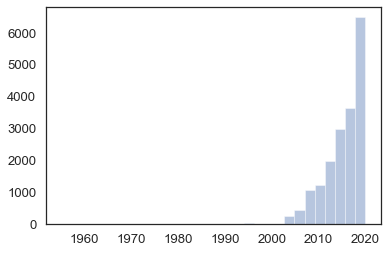

In [71]:
sns.distplot(df_meta.year.tolist(), bins=30, kde=False)

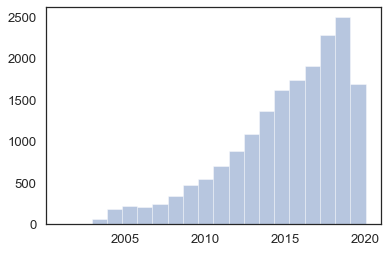

In [72]:
sns.distplot(df_meta[(pd.notnull(df_meta.year)) & (df_meta.year > "2000")].year.tolist(), bins=20, hist=True, kde=False)

#### Null values

In [8]:
df_meta.shape

(29500, 15)

In [9]:
sum(pd.notnull(df_meta.abstract))

26553

In [10]:
sum(pd.notnull(df_meta.doi))

26357

In [11]:
sum(pd.notnull(df_meta.pmcid))

27337

In [12]:
sum(pd.notnull(df_meta.pubmed_id))

16730

In [13]:
sum(pd.notnull(df_meta.journal))

17791

In [14]:
sum(pd.notnull(df_meta.has_full_text))

17420

#### Journals

In [15]:
df_meta.journal.value_counts()[:30]

PLoS One                          2204
Emerg Infect Dis                   941
Sci Rep                            800
PLoS Pathog                        729
Viruses                            638
Virol J                            398
mBio                               330
BMC Infect Dis                     280
Nucleic Acids Res                  274
PLoS Negl Trop Dis                 227
Front Immunol                      225
Front Microbiol                    217
PLoS Comput Biol                   215
Nat Commun                         184
BMC Vet Res                        173
BMC Public Health                  168
Emerg Microbes Infect              155
BMJ Open                           153
Influenza Other Respir Viruses     151
PLoS Med                           137
BMC Genomics                       132
Int J Mol Sci                      129
Molecules                          121
BMC Bioinformatics                 117
Vet Res                             96
Crit Care                

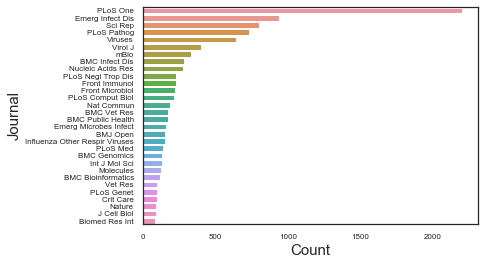

In [16]:
df_sub = df_meta[df_meta.journal.isin(df_meta.journal.value_counts()[:30].index.tolist())]
b = sns.countplot(y="journal", data=df_sub, order=df_sub['journal'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Journal",fontsize=15)
b.tick_params(labelsize=8)

#### Sources and licenses

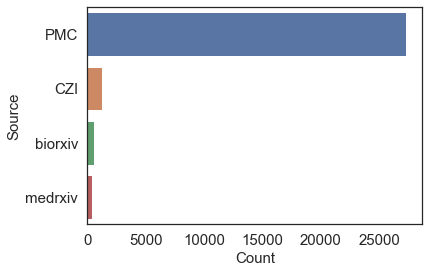

In [17]:
# source
df_sub = df_meta[df_meta.source_x.isin(df_meta.source_x.value_counts()[:30].index.tolist())]
b = sns.countplot(y="source_x", data=df_sub, order=df_sub['source_x'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Source",fontsize=15)
b.tick_params(labelsize=15)

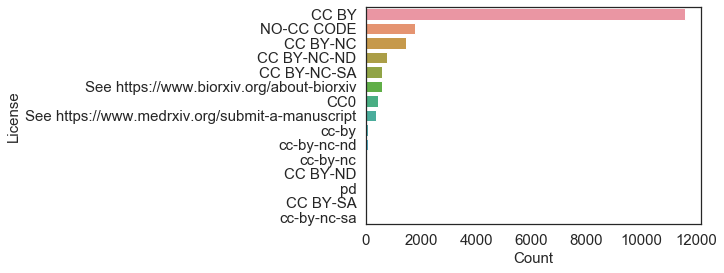

In [18]:
# license
df_sub = df_meta[df_meta.license.isin(df_meta.license.value_counts()[:30].index.tolist())]
b = sns.countplot(y="license", data=df_sub, order=df_sub['license'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("License",fontsize=15)
b.tick_params(labelsize=15)

#### Full text availability

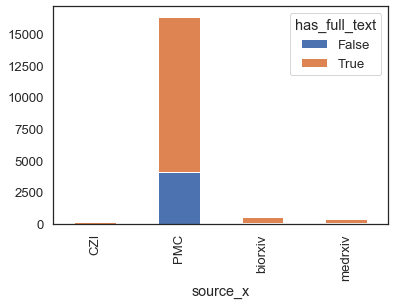

In [19]:
# full text x source
df_plot = df_meta.groupby(['has_full_text', 'source_x']).size().reset_index().pivot(columns='has_full_text', index='source_x', values=0)
df_plot.plot(kind='bar', stacked=True)

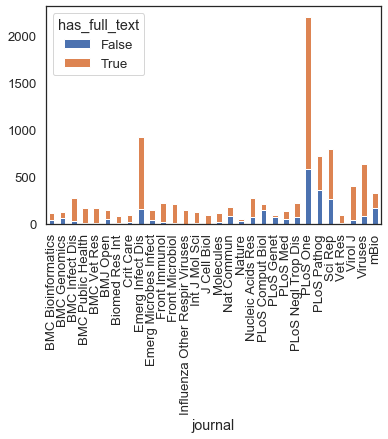

In [20]:
# full text x journal
df_sub = df_meta[df_meta.journal.isin(df_meta.journal.value_counts()[:30].index.tolist())]
df_plot = df_sub.groupby(['has_full_text', 'journal']).size().reset_index().pivot(columns='has_full_text', index='journal', values=0)
df_plot.plot(kind='bar', stacked=True)

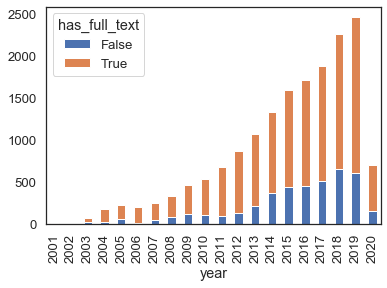

In [21]:
# full text x year
df_sub = df_meta[(pd.notnull(df_meta.year)) & (df_meta.year > "2000")]
df_plot = df_sub.groupby(['has_full_text', 'year']).size().reset_index().pivot(columns='has_full_text', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)

### Coverage wrt Dimensions and WHO

This is still problematically low..

In [22]:
# datasets

who_latest = "../covid-19/datasets/WHO_13_03_2020.csv"
dimensions_latest = "../covid-19/datasets/Dimensions_13_03_2020.csv"

df_who = pd.read_csv(who_latest)
df_dimensions = pd.read_csv(dimensions_latest)

In [23]:
who_dois = df_who[pd.notnull(df_who["DOI"])]["DOI"].tolist()
dimensions_dois = df_dimensions[pd.notnull(df_dimensions["DOI"])]["DOI"].tolist()

In [24]:
cord_dois = df_meta[pd.notnull(df_meta["doi"])]["doi"].tolist()

In [25]:
len(cord_dois)

26357

In [26]:
len(set(cord_dois).intersection(set(who_dois)))/len(set(who_dois))

0.581446311176041

In [27]:
len(set(cord_dois).intersection(set(dimensions_dois)))/len(set(dimensions_dois))

0.30379241516966066

## Abstracts

#### Language modelling

In [28]:
abstracts = df_meta[pd.notnull(df_meta["abstract"])].abstract.tolist()
abstracts[0]

'The geographic spread of 2019 novel coronavirus (COVID-19) infections from the epicenter of Wuhan, China, has provided an opportunity to study the natural history of the recently emerged virus. Using publicly available event-date data from the ongoing epidemic, the present study investigated the incubation period and other time intervals that govern the epidemiological dynamics of COVID-19 infections. Our results show that the incubation period falls within the range of 2&ndash;14 days with 95% confidence and has a mean of around 5 days when approximated using the best-fit lognormal distribution. The mean time from illness onset to hospital admission (for treatment and/or isolation) was estimated at 3&ndash;4 days without truncation and at 5&ndash;9 days when right truncated. Based on the 95th percentile estimate of the incubation period, we recommend that the length of quarantine should be at least 14 days. The median time delay of 13 days from illness onset to death (17 days with ri

In [29]:
# TODO

#### Topic modelling

In [33]:
from tqdm import tqdm
import gensim, sklearn, spacy
import pyLDAvis.gensim

In [34]:
!python -m spacy download en


    Linking successful
    /anaconda3/envs/covid/lib/python3.7/site-packages/en_core_web_sm -->
    /anaconda3/envs/covid/lib/python3.7/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [35]:
nlp = spacy.load('en')
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

In [36]:
%%time

processed_docs = list()
for doc in nlp.pipe(abstracts, n_threads=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    #ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than one word.
    #doc.extend([str(entity) for entity in ents if len(entity) > 1])
                        
    processed_docs.append(doc)

CPU times: user 1h 5min 3s, sys: 5min 27s, total: 1h 10min 30s
Wall time: 18min 30s


In [38]:
import pickle

pickle.dump(processed_docs, open("working_folder/processed_docs.pk", "wb"))

In [41]:
import pickle

processed_docs = pickle.load(open("working_folder/processed_docs.pk", "rb"))

In [42]:
docs = processed_docs
del processed_docs

# Add bigrams
from gensim.models.phrases import Phrases
# Add bigrams to docs (only ones that appear several times or more). A better approach would be to use a chi_sq test.
bigram = Phrases(docs, min_count=50)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [43]:
# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 5

In [44]:
# Create a dictionary representation of the documents, and filter out frequent and rare words.
from gensim.corpora import Dictionary
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
#MmCorpus.serialize("models/corpus.mm", corpus)

print('Number of unique tokens: %d' % len(dictionary))
print('Number of docs: %d (%d)' % (len(corpus),len(abstracts)))

Number of unique tokens: 16199
Number of docs: 26553 (26553)


In [96]:
%%time

from gensim.models import LdaMulticore, LdaModel
params = {'num_topics': 20,'passes': 3, 'random_state': seed}
model = LdaModel(corpus=corpus, num_topics=params['num_topics'], id2word=dictionary, #workers=6,
                passes=params['passes'], random_state=params['random_state'])

CPU times: user 58.7 s, sys: 732 ms, total: 59.4 s
Wall time: 56.8 s


In [97]:
model.show_topics(num_words=5, num_topics=params['num_topics'])

[(0,
  '0.018*"disease" + 0.012*"review" + 0.012*"system" + 0.010*"research" + 0.009*"development"'),
 (1,
  '0.088*"sars" + 0.072*"cov" + 0.062*"coronavirus" + 0.030*"sars_cov" + 0.027*"respiratory"'),
 (2,
  '0.094*"influenza" + 0.018*"pandemic" + 0.015*"age" + 0.015*"vaccine" + 0.013*"year"'),
 (3,
  '0.047*"mouse" + 0.027*"cell" + 0.021*"infection" + 0.012*"disease" + 0.012*"response"'),
 (4,
  '0.030*"receptor" + 0.026*"bind" + 0.020*"human" + 0.016*"interaction" + 0.010*"protein"'),
 (5,
  '0.045*"rna" + 0.038*"protein" + 0.015*"viral" + 0.012*"replication" + 0.012*"structure"'),
 (6,
  '0.032*"cell" + 0.020*"epithelial" + 0.019*"mosquito" + 0.016*"airway" + 0.016*"dengue"'),
 (7,
  '0.035*"drug" + 0.025*"antiviral" + 0.022*"activity" + 0.018*"inhibitor" + 0.018*"treatment"'),
 (8,
  '0.061*"respiratory" + 0.040*"infection" + 0.021*"child" + 0.017*"viral" + 0.015*"patient"'),
 (9,
  '0.031*"sequence" + 0.030*"viral" + 0.028*"genome" + 0.019*"identify" + 0.016*"sequencing"'),
 (10

In [98]:
# plot topics (NOTE: the IDs here do not match those from the model)
data =  pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.display(data)

In [99]:
# topics over time
# the topics of ALL the documents of our corpus

df_local = df_meta[pd.notnull(df_meta["abstract"])]
publication_years = df_local.year.tolist()
dois = df_local.doi.tolist()
topics = np.zeros((len(docs),params['num_topics']))

for n,doc_topics in enumerate(model.get_document_topics(corpus)):
    for t in doc_topics:
        topics[n][t[0]] = t[1]

In [101]:
topics[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0381675 , 0.        , 0.        , 0.23311183, 0.        ,
       0.        , 0.40573639, 0.        , 0.        , 0.06421354,
       0.        , 0.        , 0.        , 0.06456777, 0.18705295])

In [102]:
model.get_document_topics(corpus[0])

[(5, 0.03816727),
 (8, 0.23311415),
 (11, 0.4057444),
 (14, 0.06421739),
 (18, 0.06454027),
 (19, 0.18706645)]

In [103]:
df_topics = pd.DataFrame(topics)

In [104]:
df_topics["year"] = publication_years
df_topics["doi"] = dois

In [107]:
from_which_year = "2000"

grouped = df_topics.groupby('year')
df_grouped = grouped.aggregate(np.mean)
df_grouped = df_grouped[df_grouped.index >= from_which_year]
#df_grouped

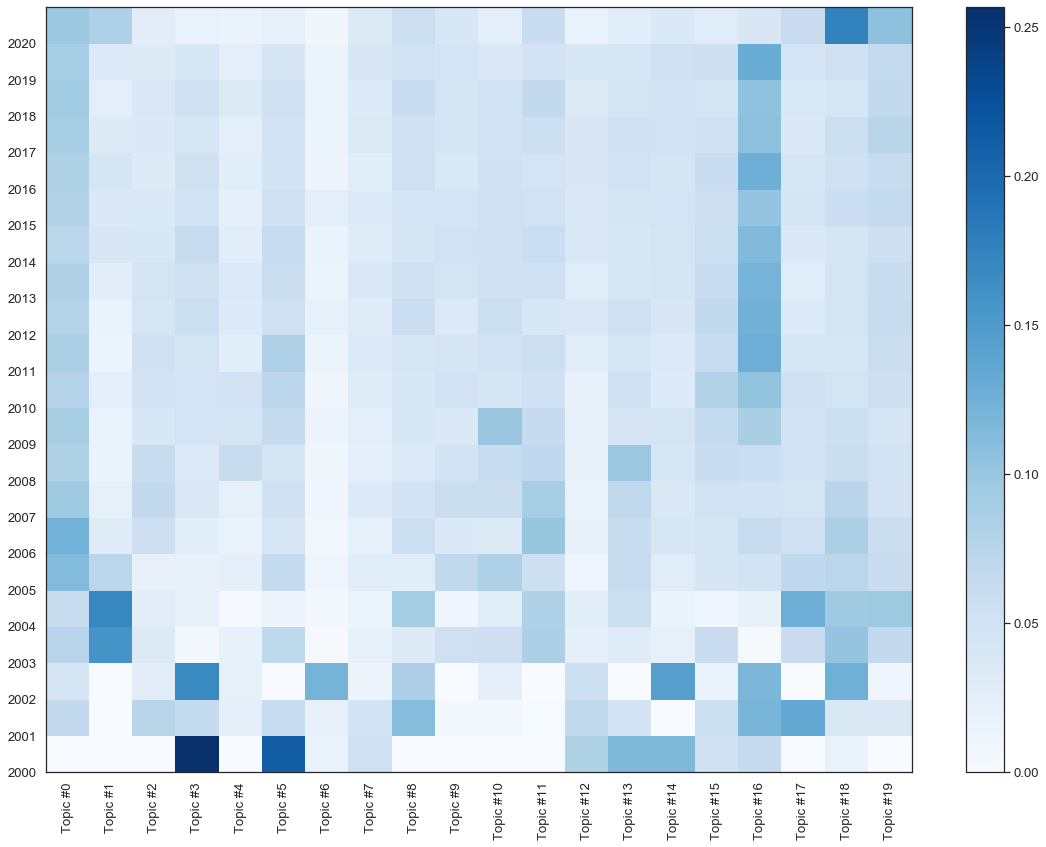

In [109]:
fig = plt.figure(figsize=(16, 12))
plt.pcolor(df_grouped.to_numpy(), norm=None, cmap='Blues')
plt.yticks(np.arange(df_grouped.to_numpy().shape[0]), df_grouped.index.values)
plt.xticks(np.arange(df_grouped.to_numpy().shape[1])+0.5, ["Topic #"+str(n) for n in range(model.num_topics)], rotation = 90)
plt.colorbar(cmap='Blues')  # plot colorbar
plt.tight_layout()  # fixes margins
plt.show()